## CDS ML Assignment 1
##### Group 37 - Rahul Deivasigamani (S1157698) - Joshua John Gigi (S1140063) - Anestis Pantazis (S1169388)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Ex 1.1 (Mackay Ex 2.10)

Urn A contains three balls: one black, and two white; urn B contains three balls: two black, and one white. One of the urns is selected at random and one ball is drawn. The ball is black. What is the probability that the selected urn is urn A?

#### Solution 1.1
To solve this, we use Bayes' Theorem. First, let's define our events:

- $U_A$: The event that Urn A was selected.
- $U_B$: The event that Urn B was selected.
- $B$: The event that a black ball was drawn.

The probability of choosing either urn A or B is 0.5 since the choice is random

$$P(U_A) = P(U_B) = \frac{1}{2}$$

The probability of drawing a black ball, given a specific urn are: $P(B | U_A) \;and\; P(B | U_B)$ 


Urn A has 1 black ball out of 3 total.
$$P(B | U_A)  = \frac{1}{3}$$
Urn B has 2 black balls out of 3 total.

$$P(B | U_B) = \frac{2}{3}$$

$\therefore$ The probability of choosing Urn A given that the selected ball is Black,
  
Using Bayes' Theorem :

$$P(U_A | B) = \frac{P(B | U_A) P(U_A)}{P(B|U_A)P(U_A) + P(B|U_B)P(U_B)}$$

$$ = \frac{\frac{1}{3}.\frac{1}{2}}{\frac{1}{3}.\frac{1}{2}+\frac{2}{3}.\frac{1}{2}}$$

$$ = \frac{\frac{1}{6}}{\frac{3}{6}} $$

$$\therefore (U_A | B) = \frac{1}{3}$$
  

#### Ex 1.2
Consider $11$ urns $u_{i}$, $i=0,...,10$, each with $10$ balls.
Urn $u_{i}$ has $i$ black balls and $10-i$ white balls. Select
one urn at random, and draw $N$ times with replacement from that
urn. Suppose that the outcome after $N=10$ draws is that the number
of black balls that have been drawn is even. What is the probability
that urn $u_{i}$ was selected?

#### Solution 1.2
We formally define the events and key probabilities:

- **Hypothesis, $U_i$**: The event that urn $u_i$ was selected, for $i \in \{0, 1, \dots, 10\}$.
- **Evidence, $E$**: The event that after $N=10$ draws, the number of black balls drawn is even.
- **Basic Outcome, $B$**: The event that a *single* ball drawn is black.
- **Prior Probability**: Since an urn is selected at random from 11 urns, the prior is uniform:
  $$
  P(U_i) = \frac{1}{11} \quad \forall i \in \{0, 1, \dots, 10\}
  $$
- **Conditional Probability of a Single Draw**: The probability of drawing a black ball from urn $u_i$ is:
  $$
  P(B | U_i) = \frac{i}{10}
  $$

Need to find the posterior probability, $P(U_i | E)$.

Using Bayes' Theorem:
$$P(U_i | E) = \frac{P(E | U_i) P(U_i)}{P(E)}$$

The prior probability for selecting any given urn is:
$$P(U_i) = \frac{1}{11}$$

For Likelihood i.e., $P(E|U_i)$ , let $K$ be the random variable for the number of black balls drawn in $N=10$ trials. This process follows a Binomial Distribution. The probability of drawing *exactly* $k$ black balls is given by the Binomial PMF, where the term $\binom{N}{k}$ counts the number of distinct sequences:
$$P(K=k | U_i) = \binom{N}{k} [P(B|U_i)]^k [1 - P(B|U_i)]^{N-k}$$
Our evidence $E$ is that $k$ is even. The likelihood is therefore the sum of these probabilities over all even values of $k$:
$$P(E | U_i) = \sum_{k \in \{0,2, \dots, 10\}} \binom{10}{k} [P(B|U_i)]^k [1 - P(B|U_i)]^{10-k}$$

Let $p = P(B|U_i) \text{        and       }q = 1 - P(B|U_i)$

The Binomial Theorem gives us the following identities:

$(q+p)^N = \sum_{k=0}^N \binom{N}{k} p^k q^{N-k}$

$(q-p)^N = \sum_{k=0}^N \binom{N}{k} (-p)^k q^{N-k}$

Adding these two,
$$
(q+p)^N + (q-p)^N = 2 \sum_{k \in \{0,2,4,\dots\}} \binom{N}{k} p^k q^{N-k}
$$

$$
\sum_{k \in \{0,2,4,\dots\}} \binom{N}{k} p^k q^{N-k} = \frac{(q+p)^N + (q-p)^N}{2}
$$

We now have our simplified formula. We can substitute our formal probability notations back in.
$$
P(E | U_i) = \frac{([1 - P(B|U_i)] + P(B|U_i))^N + ([1 - P(B|U_i)] - P(B|U_i))^N}{2}
$$


$$
P(E | U_i) = \frac{1^{10} + (1 - 2P(B|U_i))^{10}}{2} = \frac{1 + (1 - 2P(B|U_i))^{10}}{2}
$$
Finally, we substitute the known value $P(B|U_i) = i/10$:
$$
P(E | U_i) = \frac{1 + \left(1 - 2\left(\frac{i}{10}\right)\right)^{10}}{2} = \frac{1 + \left(1 - \frac{i}{5}\right)^{10}}{2}
$$

The marginal evidence $P(E)$ is the total probability of observing the evidence, found using the Law of Total Probability by summing over all possible urns:
$$P(E) = \sum_{j=0}^{10} P(E | U_j) P(U_j)$$
Since the prior $P(U_j) = \frac{1}{11}$ is a constant, we can factor it out:
$$P(E) = \frac{1}{11} \sum_{j=0}^{10} P(E | U_j) = \frac{1}{11} \sum_{j=0}^{10} \left[ \frac{1 + \left(1 - \frac{j}{5}\right)^{10}}{2} \right]$$


$ \therefore$ substituting all the components,
$$P(U_i | E) = \frac{P(E | U_i) P(U_i)}{P(E)} = \frac{\left[ \frac{1 + \left(1 - \frac{i}{5}\right)^{10}}{2} \right] \cdot \frac{1}{11}}{\frac{1}{11} \sum_{j=0}^{10} \left[ \frac{1 + \left(1 - \frac{j}{5}\right)^{10}}{2} \right]}$$

$\therefore$ the posterior probability:
$$P(U_i | E) = \frac{1 + \left(1 - \frac{i}{5}\right)^{10}}{\sum_{j=0}^{10} \left[ 1 + \left(1 - \frac{j}{5}\right)^{10} \right]}$$


Sum of all posterior probabilities: 1.00


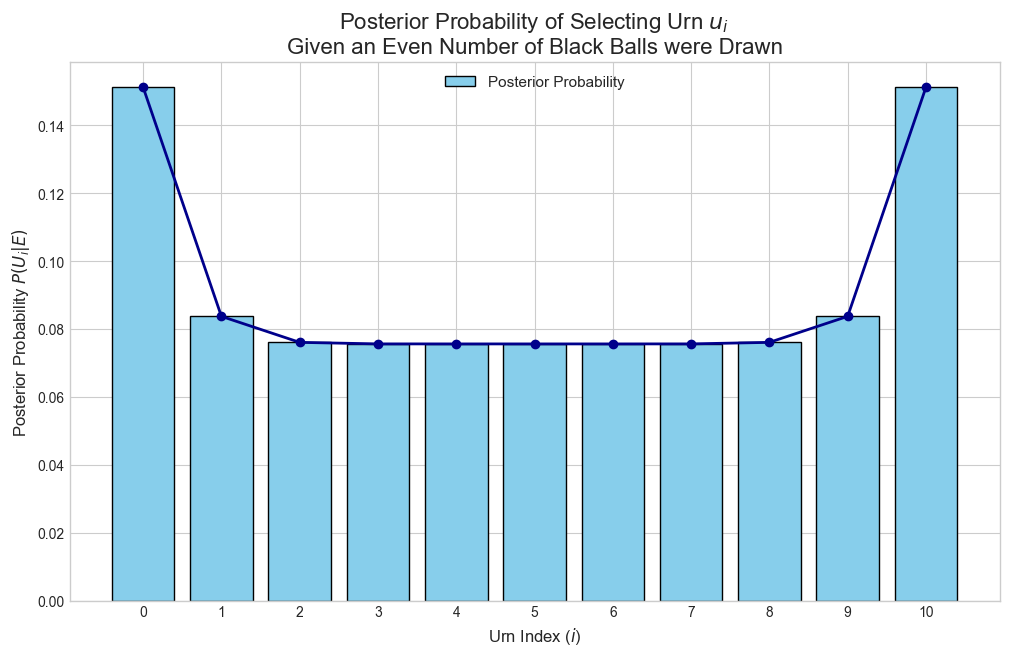

In [3]:
# Urn indices from 0 to 10
urn_indices = np.arange(11)
N = 10            # number of draws

# Using the Final Formula we calculated above

# Calculate the numerator for each urn i. This term is proportional to the likelihood.
# Numerator = 1 + (1 - i/5)^10
likelihood_numerator = 1 + (1 - urn_indices / 5)**N

# Calculate the denominator, which is the sum of all numerator terms.
denominator = np.sum(likelihood_numerator)

posterior_probability = likelihood_numerator / denominator          # Probability that Urn U_i was selected given that the number of black balls drawn
                                                                    # was even after N draws
print(f"\nSum of all posterior probabilities: {np.sum(posterior_probability):.2f}")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the posterior distribution as a bar chart
ax.bar(urn_indices, posterior_probability, color='skyblue', edgecolor='black', zorder=2, label='Posterior Probability')

# Overlay points and a line to emphasize the shape
ax.plot(urn_indices, posterior_probability, 'o-', color='darkblue', lw=2, zorder=3)

# Add labels, titles, and formatting
ax.set_title('Posterior Probability of Selecting Urn $u_i$\nGiven an Even Number of Black Balls were Drawn', fontsize=16)
ax.set_xlabel('Urn Index ($i$)', fontsize=12)
ax.set_ylabel('Posterior Probability $P(U_i|E)$', fontsize=12)
ax.set_xticks(urn_indices) # Ensure all urn indices are shown on the x-axis
ax.legend(fontsize=11)
ax.grid(True, zorder=0)

# Show the plot
plt.show()

#### Ex 1.3

Suppose we are told that data are drawn from an oracle that is a Gaussian
distribution with $\sigma=1$ and we believe that $\mu$ can have
any value with equal probability.
* The oracle produces one data point with value $x$. What can we infer
about $\mu$?
* The oracle produces a set of $N$ data points with values $x_{i},...,x_{N}$.
What can we infer about $\mu$ ? Hint: use the fact that the data
points are produced independently. What is the probability that the
data set is drawn from the oracle? Show that the result is Gaussian
in $\mu$ with mean $\bar{x}=\sum_{i=1}^{N}x_{i}$ and variance $\frac{1}{N}$.

#### Solution 1.3
1. If $\sigma=1$ and there is only one data point with value $x$, then: $\mu \sim \mathcal{N}(x,1)$$

2. If the $N$ data points are given from $x_i$ to $x_N$, 


    $\text{then,}$

    $$ \mu \sim \mathcal{N}(\bar{x},\frac{1}{N}) \text{             where           }\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i$$

    $\therefore$  in this case the probability density for a single observation is: 

    $$p(x|\mu)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(x-\mu)^2}$$

    The total probability is: 

    $$p(x_1,x_2,...,x_N|\mu)=\prod_{i=1}^{N}p(x_i|\mu)=\prod_{i=1}^{N}\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(x_i-\mu)^2}$$

    Since the prior is flat, the posterior is proportional to: 

    $$p(\mu|x_1, ... ,x_N) \propto e^{-\frac{1}{2}\sum_{i=1}^{N}(x_i-\mu)^2}$$

    $\therefore$ the sum in the exponential can be expanded as: 

    $$\sum_{i=1}^{N}(x_i-\mu)^2 = \sum_{i=1}^{N}x_i^2 - 2\mu\sum_{i=1}^{N}x_i + N\mu^2$$

    Since the first term does not depend on $\mu$, it can be ignored. Thus, the proportionality can be rewritten as:

    $$p(\mu|x_1, ... ,x_N) \propto e^{-\frac{1}{2}(N\mu^2 - 2\mu\sum_{i=1}^{N}x_i)} = e^{-\frac{1}{2}(N\mu^2 - 2N\mu\bar{x})}$$

    Rearranging the inside of the exponential:

    $$-\frac{1}{2}(N\mu^2 - 2N\mu\bar{x}) = -\frac{1}{2}N(\mu^2 - 2\mu\bar{x}) = -\frac{1}{2}N((\mu^2 - 2\mu\bar{x}+\bar{x}^2)-\bar{x}^2)=-\frac{1}{2}N((\mu - \bar{x})^2 -\bar{x}^2)$$

    The proportionality becomes:

    $$p(\mu|x_1, ... ,x_N) \propto e^{-\frac{1}{2}N(\mu - \bar{x})^2} * e^{\frac{1}{2}N\bar{x}^2}$$

    The second exponential factor doesn't depend on $\mu$, so it is a constant, thus:

    $$p(\mu|x_1, ... ,x_N) \propto e^{-\frac{1}{2}N(\mu - \bar{x})^2}$$

    The above expression is exactly the Gaussian form $\mu \sim \mathcal{N}(\bar{x},\frac{1}{N})$.

#### Ex 1.4

Show that the $n$-dimensional multivariate Gaussian distribution
$$
p\left(x|\mu,\Sigma\right)=\frac{1}{\sqrt{\left(2\pi\right)^{n}\det\Sigma}}\exp\left[-\frac{1}{2}\left(x-\mu\right)^{T}\Sigma^{-1}\left(x-\mu\right)\right]
$$
is an exponential family distribution. In particular, the multivariate
Gaussian distribution is the a maximum entropy solution. What are
the constraints?

#### Solution 1.4

**Required Form:**
$$p(x)=\exp\left(-\sum_{a=1}^M \lambda_a \phi_a(x)-A \right) \text{where A is a constant} $$
We have:
$$p(x|\mu,\Sigma) = \frac{1}{\sqrt{\left(2\pi\right)^{n}\det\Sigma}}\exp\left[-\frac{1}{2}\left(x-\mu\right)^{T}\Sigma^{-1}\left(x-\mu\right)\right]$$
To match the target form, we use the identity $Y = \exp(\log(Y))$ to bring the normalization constant inside the main exponential:
$$p(x|\mu,\Sigma) = \exp\left( -\frac{n}{2}\log(2\pi) - \frac{1}{2}\log(\det\Sigma) - \frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) \right)$$

Expanding,
$$(x-\mu)^T\Sigma^{-1}(x-\mu) = x^T\Sigma^{-1}x - 2\mu^T\Sigma^{-1}x + \mu^T\Sigma^{-1}\mu$$
Substituting this back into the exponent and distributing the $-\frac{1}{2}$ factor gives:
$$ \text{Exponent} = \underbrace{-\frac{1}{2}x^T\Sigma^{-1}x + \mu^T\Sigma^{-1}x}_{\text{Terms depending on } x} \space\space\space \underbrace{-\frac{1}{2}\mu^T\Sigma^{-1}\mu -\frac{1}{2}\log(\det\Sigma) - \frac{n}{2}\log(2\pi)}_{\text{Constant terms}} $$

We can now map the grouped terms to the required form's components.

The part of the exponent that depends on $x$ must match $-\sum_{a=1}^M \lambda_a \phi_a(x)$. Our terms are:
$$\mu^T\Sigma^{-1}x - \frac{1}{2}x^T\Sigma^{-1}x$$
This shows that the functions $\phi_a(x)$ are the linear ($x_i$) and quadratic ($x_i x_j$) components of the input vector $x$.

- **Linear Terms:**
  - **Functions:** $\phi_i(x) = x_i$ for $i=1, \dots, n$.
  - **Parameters:** To match the form $-\lambda_i \phi_i(x) = (\Sigma^{-1}\mu)_i x_i$, we have $\lambda_i = -(\Sigma^{-1}\mu)_i$.

- **Quadratic Terms:**
  - **Functions:** $\phi_{ij}(x) = x_i x_j$ for $1 \le i \le j \le n$.
  - **Parameters:** To match the form $-\lambda_{ij} \phi_{ij}(x) = -\frac{1}{2}(\Sigma^{-1})_{ij} x_i x_j$, we have $\lambda_{ij} \approx \frac{1}{2}(\Sigma^{-1})_{ij}$.

$\therefore \text{The Normalization Constant}$ $A$ corresponds to all terms that do not depend on $x$. We set $-A$ equal to these terms:
$$-A = -\frac{1}{2}\mu^T\Sigma^{-1}\mu -\frac{1}{2}\log(\det\Sigma) - \frac{n}{2}\log(2\pi)$$
Solving for $A$:
$$A = \frac{1}{2}\mu^T\Sigma^{-1}\mu + \frac{1}{2}\log(\det\Sigma) + \frac{n}{2}\log(2\pi)$$


#### Maximum-Entropy 
Log-density of a multivariate normal
$$
\ln p(x)
= -\tfrac{1}{2}\Big(x^\top \Sigma^{-1} x - x^\top \Sigma^{-1}\mu - \mu^\top \Sigma^{-1} x
+ \log\big((2\pi)^n \det\Sigma\big) + \mu^\top \Sigma^{-1}\mu\Big).
$$

Three types of integrals (constraints)
Normalization:
$$
\int p(x)\,dx = 1.
$$

Mean:
$$
\int p(x)\, x \, dx = \mu.
$$

Second moment (covariance relation):
$$
\int p(x)\, x x^\top \, dx = \Sigma + \mu\mu^\top.
$$

#### Lagrange multipliers (general form)
A general constrained functional using Lagrange multipliers can be written as
$$
\mathcal{L}(p,\{\eta_a\})
= \int p(x)\log p(x)\,dx
+ \sum_{a} \eta_a\Big(\int p(x)\,\varphi_a(x)\,dx - S_a\Big),
$$
where each $(\eta_a)$ enforces a constraint $(\int p(x)\varphi_a(x)\,dx = S_a)$.

For our specific constraints (normalization, mean, second moment) we take multipliers $\it{a}$ (scalar), $\it{q}$ (vector), and $\Lambda$ (symmetric matrix). The entropy-based Lagrangian (with a minus sign to maximize entropy) becomes
$$
L(p)
= -\int p(x)\ln p(x)\,dx
- a\Big(\int p(x)\,dx - 1\Big)
- q^\top\Big(\int p(x)\,x\,dx - \mu\Big)
- \mathrm{Tr}\Big(\Lambda\Big(\int p(x)\,xx^\top\,dx - \Sigma - \mu\mu^\top\Big)\Big).
$$

#### Functional derivative and stationarity
Take the functional derivative of \(L\) with respect to \(p(x)\) and set it to zero:
$$
\frac{\delta L}{\delta p(x)}
= -\big(\ln p(x) + 1\big) - a - q^\top x - x^\top \Lambda x = 0.
$$

Hence
$$
\ln p(x) = -1 - a - q^\top x - x^\top \Lambda x,
$$
and therefore
$$
p(x) = \exp\big(-1 - a - q^\top x - x^\top \Lambda x\big).
$$

#### Identifying Gaussian Parameters by Matching Exponents

We have established from the Lagrange multiplier method that the log-probability of our maximum entropy distribution has the form:
$$
\ln p(x) = -1 - a - q^\top x - x^\top \Lambda x
$$
Our goal is to show this is equivalent to the log-probability of a Gaussian. First, we expand the exponent of the target Gaussian form, $-\frac{1}{2}(x-\mu)^\top \Sigma^{-1}(x-\mu)$, to see the individual terms we need to match:
$$
-\frac{1}{2}(x-\mu)^\top \Sigma^{-1}(x-\mu) = \underbrace{-\frac{1}{2}x^\top\Sigma^{-1}x}_{\text{Quadratic Term}} + \underbrace{\mu^\top\Sigma^{-1}x}_{\text{Linear Term}} \underbrace{-\frac{1}{2}\mu^\top\Sigma^{-1}\mu}_{\text{Constant Term}}
$$
Now we compare the components of our solution's exponent, $-x^\top \Lambda x - q^\top x - (1+a)$, to this target form term by term:

1.  **Quadratic Term:** The terms quadratic in $x$ must be equal. This identifies the matrix multiplier $\Lambda$.
    $$
    -x^\top \Lambda x = -\frac{1}{2}x^\top\Sigma^{-1}x \quad \implies \quad \Lambda = \frac{1}{2}\Sigma^{-1}
    $$

2.  **Linear Term:** The terms linear in $x$ must also match. This identifies the vector multiplier $q$.
    $$
    -q^\top x = \mu^\top\Sigma^{-1}x \quad \implies \quad q = -\Sigma^{-1}\mu
    $$

3.  **Constant Terms:** All remaining terms, which do not depend on $x$, must be equal. This determines the scalar multiplier $a$ by relating it to the Gaussian's normalization constant.
    $$
    -(1+a) = -\frac{1}{2}\mu^\top\Sigma^{-1}\mu - \frac{1}{2}\log\big((2\pi)^n\det\Sigma\big)
    $$

Since we have successfully determined the Lagrange multipliers ($\Lambda, q, a$) that make our maximum entropy solution identical to the multivariate Gaussian, we have shown that the two are equivalent. 

#### Ex 1.5

Consider a two-dimensional Gaussian distribution with equal variances:
$$
p\left(x_{1},x_{2}\right)\propto\exp\left[-\frac{1}{2}\left(ax_{1}^{2}+ax_{2}^{2}+2bx_{1}x_{2}\right)\right]
$$
where obviously $\left\langle x_{i}\right\rangle _{p}=0$ and $\Sigma=\left\langle xx^{T}\right\rangle _{p}=\left(\begin{array}{cc}
a & b\\
b & a
\end{array}\right)^{-1}$. We would like to approximate it with a product of two-Gaussians:
$$
q\left(x_{1},x_{2}\right)=q_{1}\left(x_{1}\right)q_{2}\left(x_{2}\right)
$$
with
$$
q_{i}\left(x\right)=\frac{e^{-\frac{x^{2}}{2\sigma_{i}^{2}}}}{\sqrt{2\pi\sigma_{i}^{2}}}
$$
We now take the following steps:

* Show that $\int dxq_{i}\left(x\right)\log q_{i}\left(x\right)=-\log\left(\sqrt{2\pi\sigma_{i}^{2}}\right)-\frac{1}{2}$
* Use the previous results to show that
$$
KL\left(q||p\right)=-\sum_{i=1}^{2}\log\left(\sqrt{2\pi\sigma_{i}^{2}}\right)+\frac{a}{2}\sum_{i=1}^{2}\sigma_{i}^{2}+\text{const}
$$
* Show that the variational solution for $q_{i}$ has $\sigma_{i}^{2}=a^{-1}$
* Show that the reverse variational solution solution is given by $\sigma_{i}^{2}=\left\langle x_{i}^{2}\right\rangle _{p}$
* Show that $\left\langle x_{i}^{2}\right\rangle _{p}=\frac{a}{a^{2}-b^{2}}$
and therefore the variance of the reverse solution is large, since
$\frac{1}{a}<\frac{a}{a^{2}-b^{2}}$ (unless $b=0$, in which case
$p$ is already factorized)

#### Ex 1.5 — Solution

We have

$$
p(x_1,x_2)\propto\exp\!\Big[-\tfrac{1}{2}\big(a x_1^2 + a x_2^2 + 2 b x_1 x_2\big)\Big],
\qquad
q(x_1,x_2)=q_1(x_1)q_2(x_2),
$$

with

$$
q_{i}\left(x\right)=\frac{e^{-\frac{x^{2}}{2\sigma_{i}^{2}}}}{\sqrt{2\pi\sigma_{i}^{2}}}, 
\qquad \mathbb{E}_q[x_i]=0.
$$

#### 1. 
$$
\text{We have}\int dx\, q_i(x)\log q_i(x).
$$

Since
$$
\log q_i(x) = -\frac{x^2}{2\sigma_i^2} - \tfrac{1}{2}\log(2\pi\sigma_i^2),
$$

we get

$$
\int q_i(x)\log q_i(x)\,dx
= -\frac{1}{2\sigma_i^2}\int q_i(x)x^2\,dx - \tfrac{1}{2}\log(2\pi\sigma_i^2).
$$

But $\int q_i(x)x^2\,dx = \sigma_i^2$, hence

$$
\int q_i(x)\log q_i(x)\,dx 
= -\tfrac{1}{2} - \tfrac{1}{2}\log(2\pi\sigma_i^2)
= -\log\!\big(\sqrt{2\pi\sigma_i^2}\big) - \tfrac{1}{2}.
$$

#### 2.

By definition,

$$
KL(q\|p)=\iint q(x_1,x_2)\log\frac{q(x_1,x_2)}{p(x_1,x_2)}\,dx_1dx_2.
$$

This expands as

$$
KL(q\|p) = \sum_{i=1}^2 \int q_i(x)\log q_i(x)\,dx
+ \mathbb{E}_q[-\log p(x_1,x_2)].
$$

From step 1, the first part is

$$
-\sum_{i=1}^2 \log\!\big(\sqrt{2\pi\sigma_i^2}\big) - 1.
$$

Now,

$$
-\log p(x_1,x_2) = \tfrac{1}{2}\big(ax_1^2+ax_2^2+2bx_1x_2\big)+\text{const}.
$$

Taking expectation under $q$:

$$
\mathbb{E}_q[-\log p] = \tfrac{a}{2}(\sigma_1^2+\sigma_2^2)+\text{const}.
$$

Hence

$$
KL(q\|p) = -\sum_{i=1}^2\log\!\big(\sqrt{2\pi\sigma_i^2}\big)
+ \frac{a}{2}\sum_{i=1}^2\sigma_i^2 + \text{const}.
$$

#### 3.

Define $s_i=\sigma_i^2$. We minimize

$$
f(s_i) = -\tfrac{1}{2}\log(2\pi s_i) + \tfrac{a}{2}s_i.
$$

Derivative:

$$
f'(s_i) = -\frac{1}{2s_i}+\frac{a}{2}=0
\quad\Rightarrow\quad s_i=\frac{1}{a}.
$$

Thus

$$
\sigma_i^2=\frac{1}{a}.
$$

#### 4.
We have
$$
KL(p\|q)=\iint p(x_1,x_2)\log\frac{p(x_1,x_2)}{q(x_1,x_2)}\,dx_1dx_2.
$$

$$\int p(x)\ln p(x) dx - \int p(x) \ln q(x) dx = H(p) - \langle\ln q(x)\rangle_p$$
Minimizing $KL(p\|q)$ gives

$$
 \Rightarrow \quad 
\sigma_i^2 = \langle x_i^2\rangle_p.
$$

#### 5.
Precision matrix:

$$
A=\begin{pmatrix}a & b \\ b & a\end{pmatrix}, \quad
\Sigma=A^{-1}=\frac{1}{a^2-b^2}\begin{pmatrix}a & -b \\ -b & a\end{pmatrix}.
$$

So

$$
\langle x_i^2\rangle_p=\Sigma_{ii}=\frac{a}{a^2-b^2}.
$$

$\therefore $ comparing forward and reverse solutions

Forward: 
$$
\sigma_i^2=\frac{1}{a}.
$$

Reverse:
$$
\sigma_i^2=\frac{a}{a^2-b^2}.
$$

Difference:

$$
\frac{a}{a^2-b^2}-\frac{1}{a}=\frac{b^2}{a(a^2-b^2)} \ge 0,
$$

with equality only if $b=0$.